In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "emilia-romagna"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,8,Emilia-Romagna,15,2,17,9,26,8,8,...,0.0,243.0,0.0,3.0,11.76,65.38,3.29,0.00,0.00,44.44
1,2020-02-26T18:00:00,8,Emilia-Romagna,20,3,23,23,46,20,21,...,1.0,186.0,0.0,14.0,13.04,50.00,11.29,0.00,50.00,76.92
2,2020-02-27T18:00:00,8,Emilia-Romagna,36,6,42,54,96,50,50,...,0.0,456.0,0.0,31.0,14.29,43.75,10.96,0.00,100.00,108.70
3,2020-02-28T18:00:00,8,Emilia-Romagna,56,6,62,81,143,47,48,...,1.0,244.0,0.0,27.0,9.68,43.36,19.67,0.00,0.00,48.96
4,2020-02-29T17:00:00,8,Emilia-Romagna,86,11,97,116,213,70,72,...,2.0,273.0,0.0,35.0,11.34,45.54,26.37,0.00,83.33,48.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2020-12-21T17:00:00,8,Emilia-Romagna,2914,203,3117,58937,62054,1138,1594,...,37.0,7938.0,3699.0,1074.0,6.51,5.02,20.08,43.09,1.00,1.87
301,2020-12-22T17:00:00,8,Emilia-Romagna,2891,210,3101,56645,59746,-2308,1162,...,68.0,19892.0,4435.0,-2292.0,6.77,5.19,5.84,26.20,3.45,-3.72
302,2020-12-23T17:00:00,8,Emilia-Romagna,2803,207,3010,55015,58025,-1721,1129,...,71.0,17913.0,4765.0,-1630.0,6.88,5.19,6.30,23.69,-1.43,-2.88
303,2020-12-24T17:00:00,8,Emilia-Romagna,2718,201,2919,54380,57299,-726,1692,...,76.0,15906.0,5825.0,-635.0,6.89,5.09,10.64,29.05,-2.90,-1.25


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 25, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 2127
Nuovi tamponi: 10861.0
Percentuale nuovi positivi/nuovi tamponi: 20.0 %
Nuovi guariti: 381.0
Nuovi deceduti: 65.0
Variazione positivi ricoverati con sintomi: -7.0
Variazione positivi in terapia intensiva: 5.0
Variazione positivi in isolamento dimiciliare: 1683.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 25, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-26T17:00:00,8,Emilia-Romagna,816,93,909,14860,15769,941,1146,...,3.0,12083.0,6570.0,877.0,10.23,5.76,9.48,17.44,5.68,6.35
1,2020-10-27T17:00:00,8,Emilia-Romagna,934,103,1037,16043,17080,1311,1413,...,15.0,21401.0,7366.0,1183.0,9.93,6.07,6.60,19.18,10.75,8.31
2,2020-10-28T17:00:00,8,Emilia-Romagna,999,119,1118,17112,18230,1150,1212,...,14.0,21376.0,8739.0,1069.0,10.64,6.13,5.67,13.87,15.53,6.73
3,2020-10-29T17:00:00,8,Emilia-Romagna,1054,123,1177,18536,19713,1483,1545,...,8.0,21860.0,8476.0,1424.0,10.45,5.97,7.07,18.23,3.36,8.13
4,2020-10-30T17:00:00,8,Emilia-Romagna,1157,119,1276,20145,21421,1708,1763,...,11.0,17577.0,6653.0,1609.0,9.33,5.96,10.03,26.50,-3.25,8.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-21T17:00:00,8,Emilia-Romagna,2914,203,3117,58937,62054,1138,1594,...,37.0,7938.0,3699.0,1074.0,6.51,5.02,20.08,43.09,1.00,1.87
57,2020-12-22T17:00:00,8,Emilia-Romagna,2891,210,3101,56645,59746,-2308,1162,...,68.0,19892.0,4435.0,-2292.0,6.77,5.19,5.84,26.20,3.45,-3.72
58,2020-12-23T17:00:00,8,Emilia-Romagna,2803,207,3010,55015,58025,-1721,1129,...,71.0,17913.0,4765.0,-1630.0,6.88,5.19,6.30,23.69,-1.43,-2.88
59,2020-12-24T17:00:00,8,Emilia-Romagna,2718,201,2919,54380,57299,-726,1692,...,76.0,15906.0,5825.0,-635.0,6.89,5.09,10.64,29.05,-2.90,-1.25


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

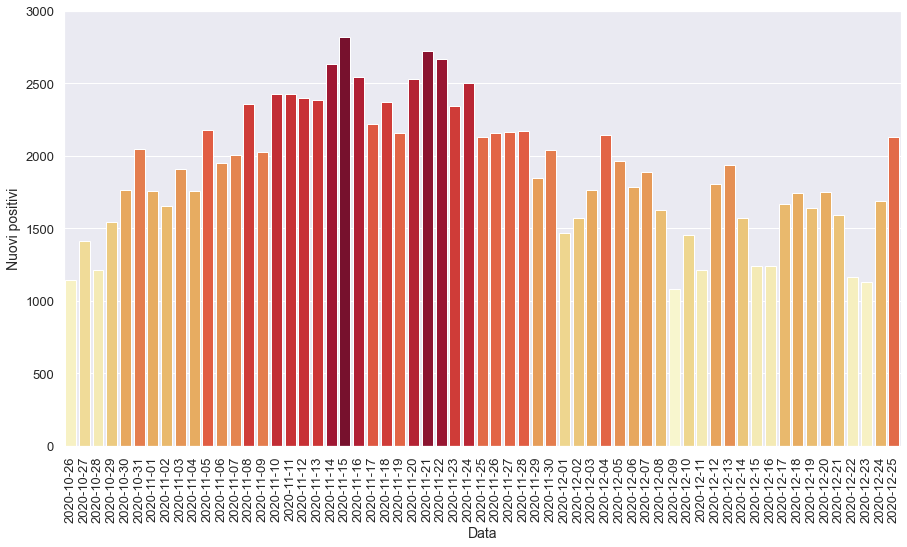

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

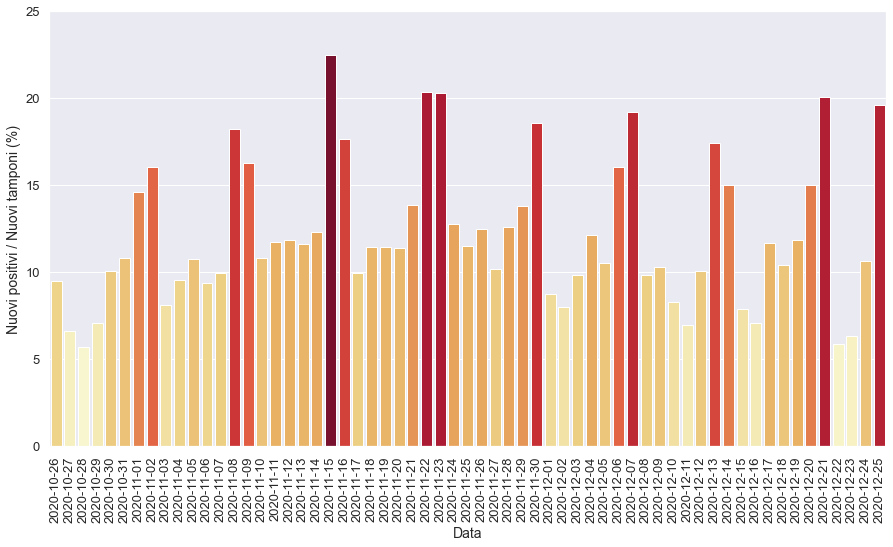

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

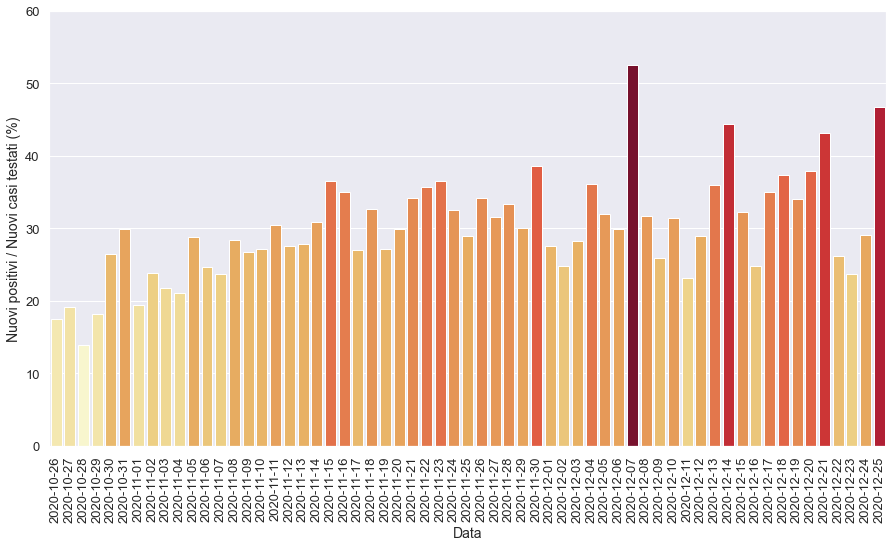

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

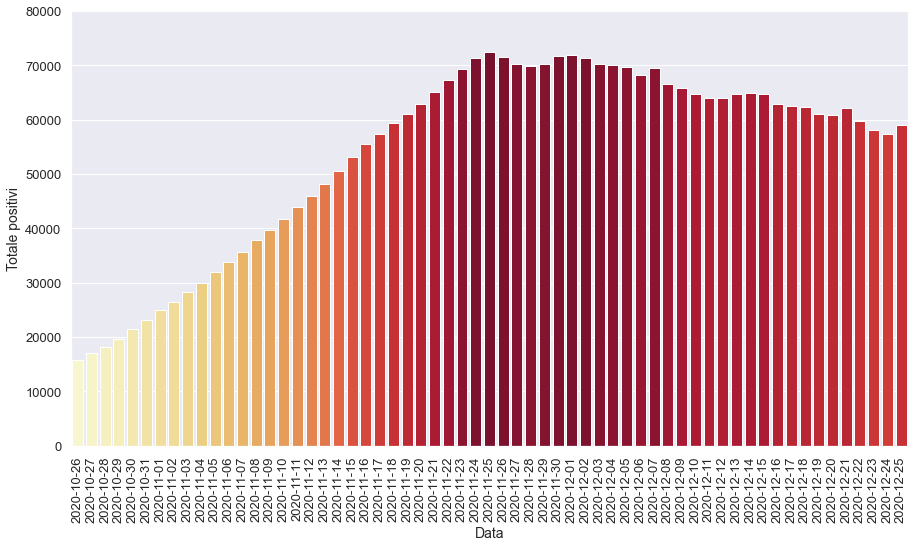

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

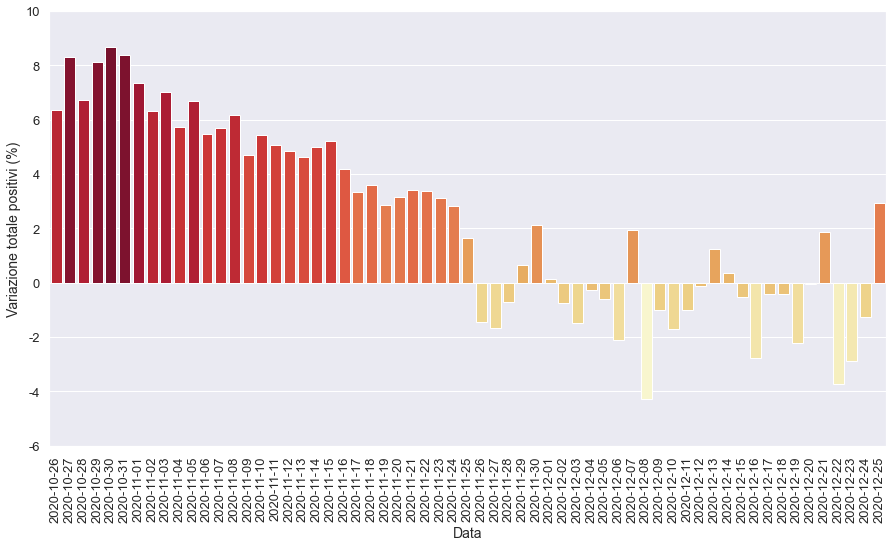

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

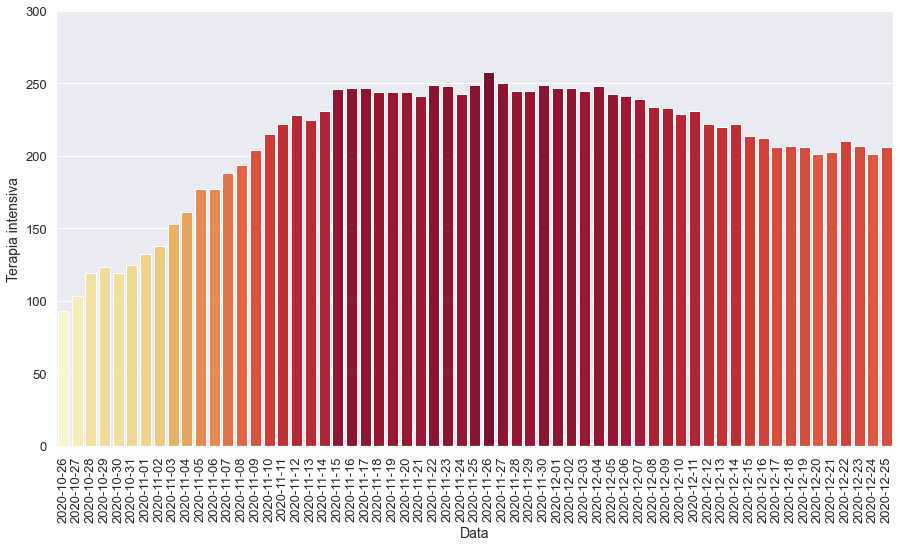

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

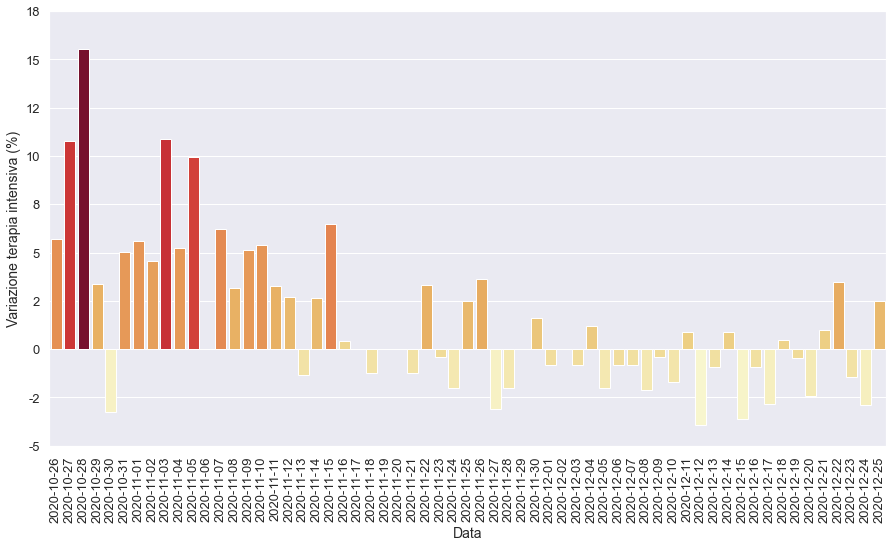

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

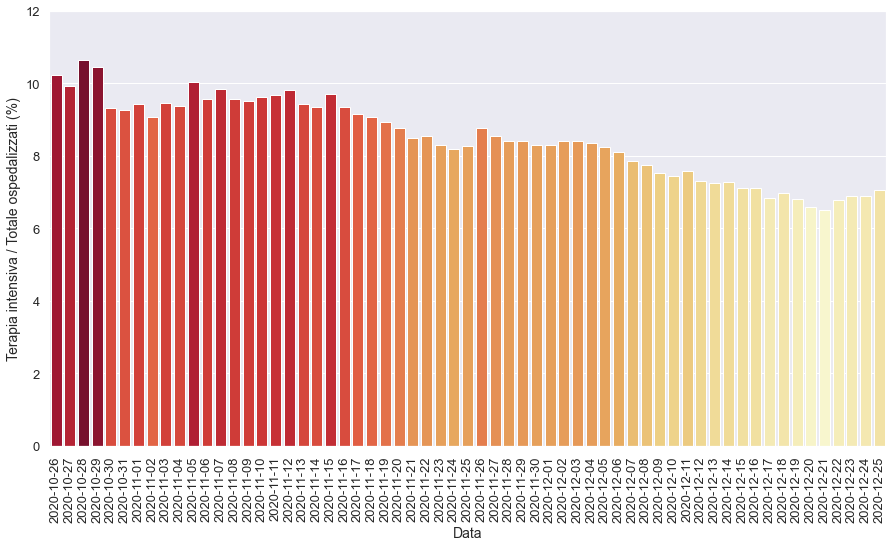

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

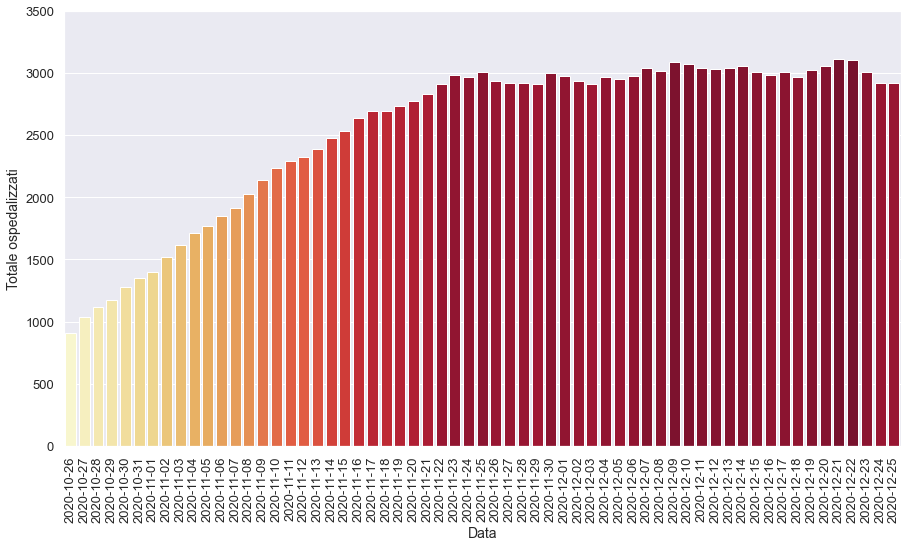

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

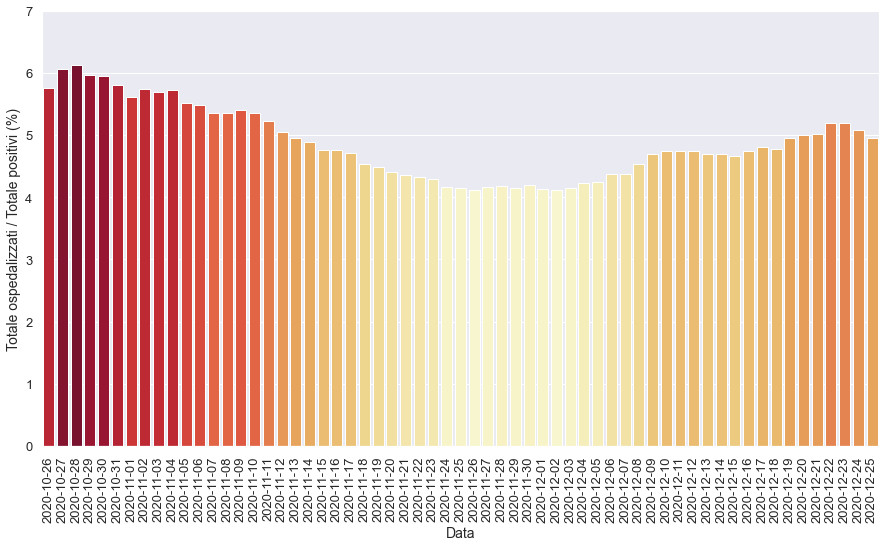

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

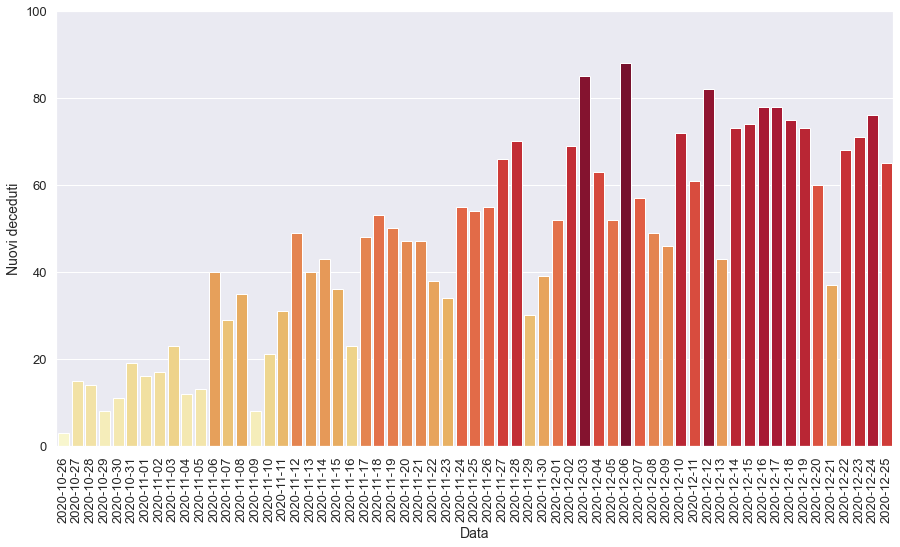

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

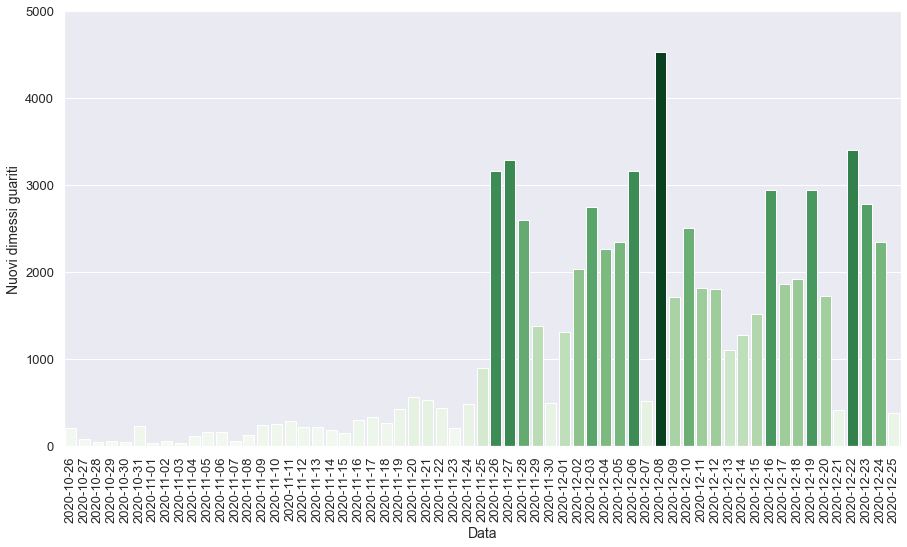

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-25T17:00:00,8,Emilia-Romagna,2763,249,3012,69514,72526,1182,2130,...,54.0,18498.0,7342.0,1136.0,8.27,4.15,11.51,29.01,2.47,1.66
1,2020-11-26T17:00:00,8,Emilia-Romagna,2679,258,2937,68535,71472,-1054,2157,...,55.0,17264.0,6319.0,-979.0,8.78,4.11,12.49,34.14,3.61,-1.45
2,2020-11-27T17:00:00,8,Emilia-Romagna,2673,250,2923,67366,70289,-1183,2165,...,66.0,21304.0,6853.0,-1169.0,8.55,4.16,10.16,31.59,-3.10,-1.66
3,2020-11-28T17:00:00,8,Emilia-Romagna,2673,245,2918,66865,69783,-506,2172,...,70.0,17241.0,6512.0,-501.0,8.40,4.18,12.60,33.35,-2.00,-0.72
4,2020-11-29T17:00:00,8,Emilia-Romagna,2668,245,2913,67316,70229,446,1850,...,30.0,13434.0,6157.0,451.0,8.41,4.15,13.77,30.05,0.00,0.64
5,2020-11-30T17:00:00,8,Emilia-Romagna,2755,249,3004,68730,71734,1505,2041,...,39.0,10992.0,5286.0,1414.0,8.29,4.19,18.57,38.61,1.63,2.14
6,2020-12-01T17:00:00,8,Emilia-Romagna,2729,247,2976,68866,71842,108,1471,...,52.0,16816.0,5346.0,136.0,8.30,4.14,8.75,27.52,-0.80,0.15
7,2020-12-02T17:00:00,8,Emilia-Romagna,2692,247,2939,68366,71305,-537,1569,...,69.0,19676.0,6319.0,-500.0,8.40,4.12,7.97,24.83,0.00,-0.75
8,2020-12-03T17:00:00,8,Emilia-Romagna,2668,245,2913,67324,70237,-1068,1766,...,85.0,17979.0,6242.0,-1042.0,8.41,4.15,9.82,28.29,-0.81,-1.50
9,2020-12-04T17:00:00,8,Emilia-Romagna,2717,248,2965,67091,70056,-181,2143,...,63.0,17677.0,5943.0,-233.0,8.36,4.23,12.12,36.06,1.22,-0.26


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

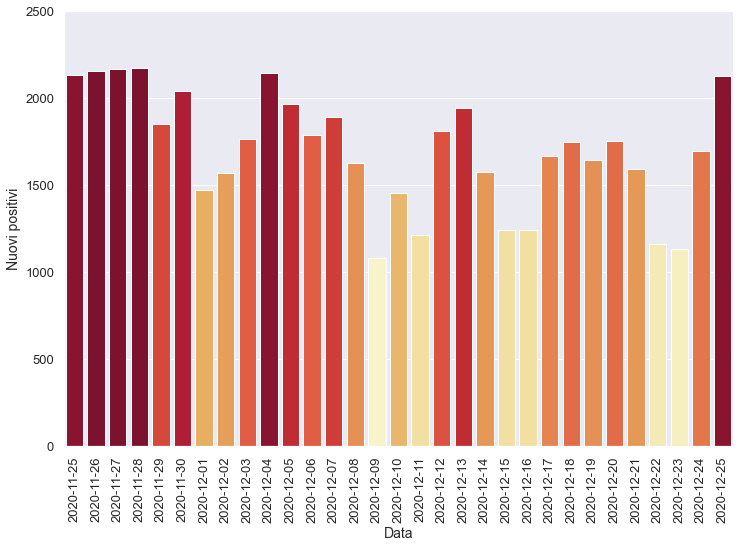

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

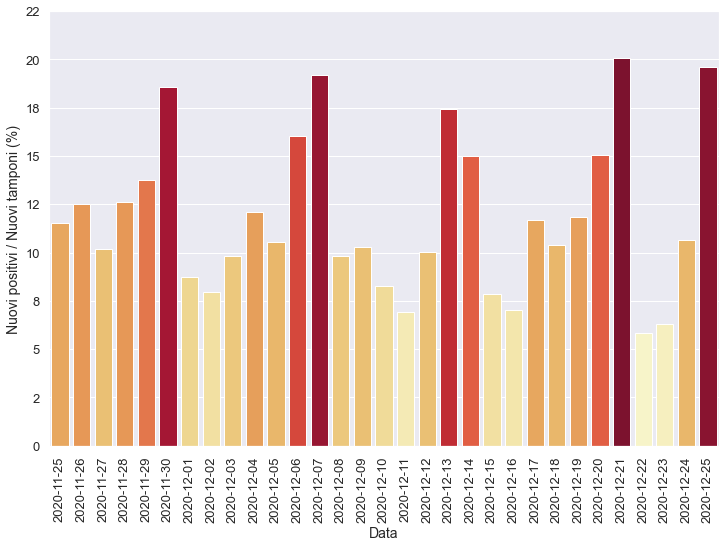

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

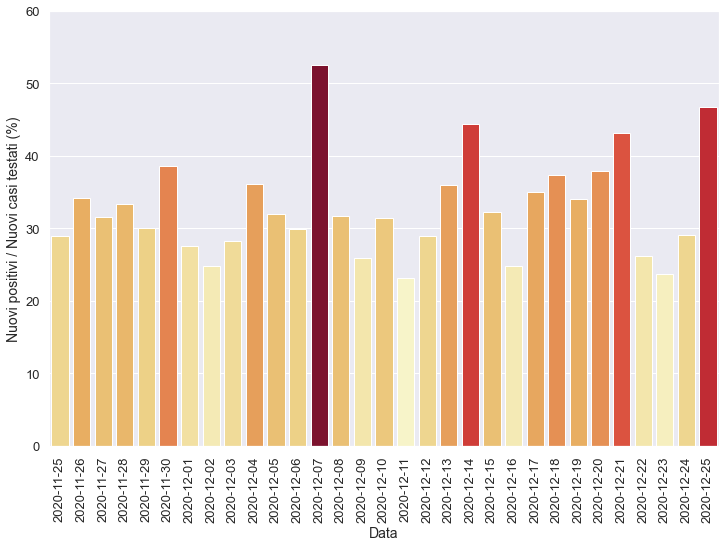

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

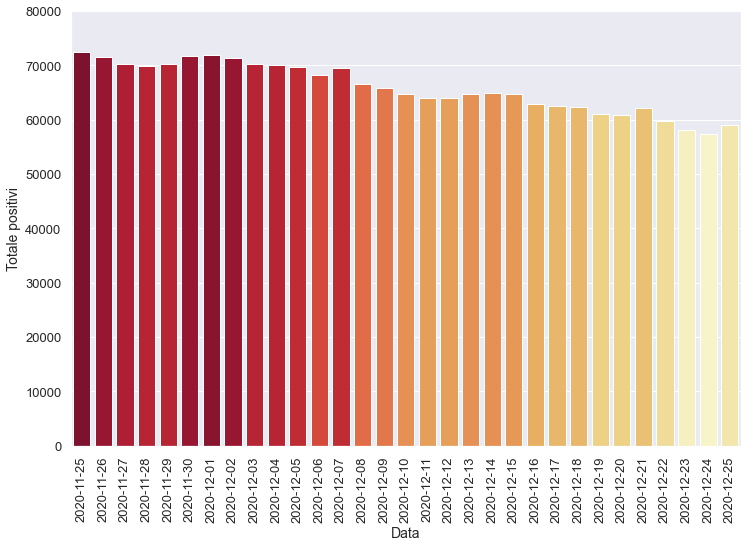

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

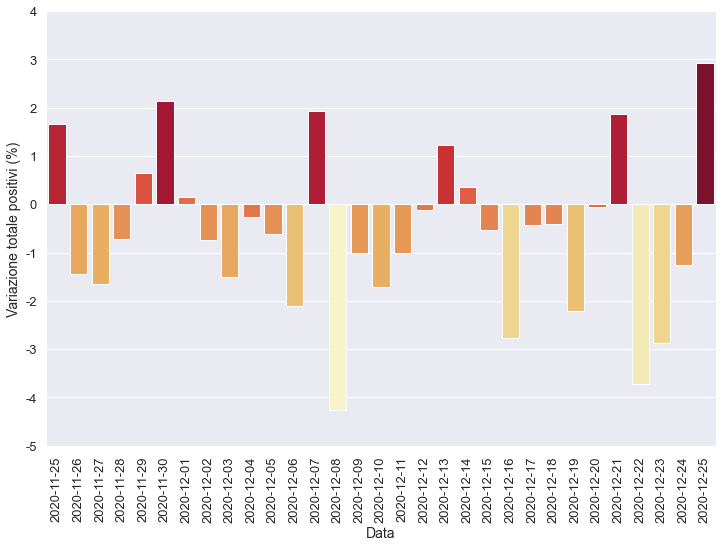

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

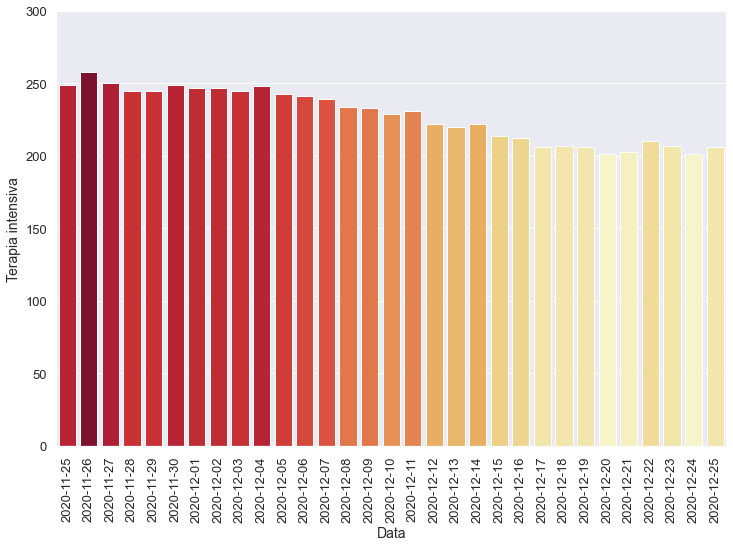

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

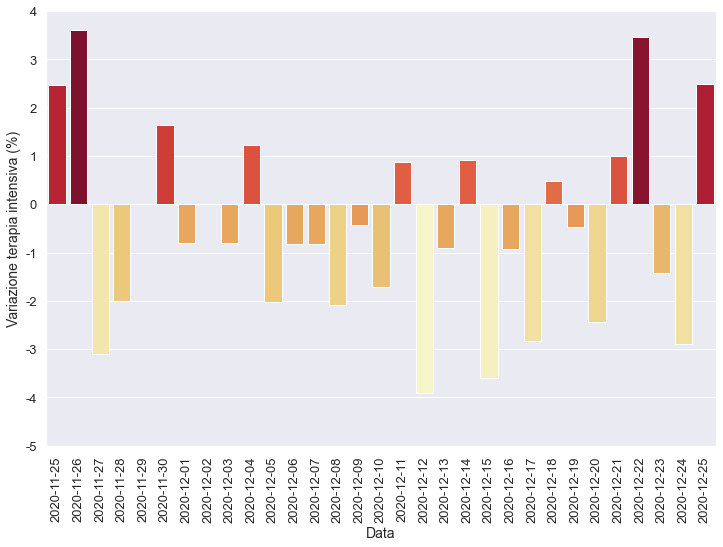

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

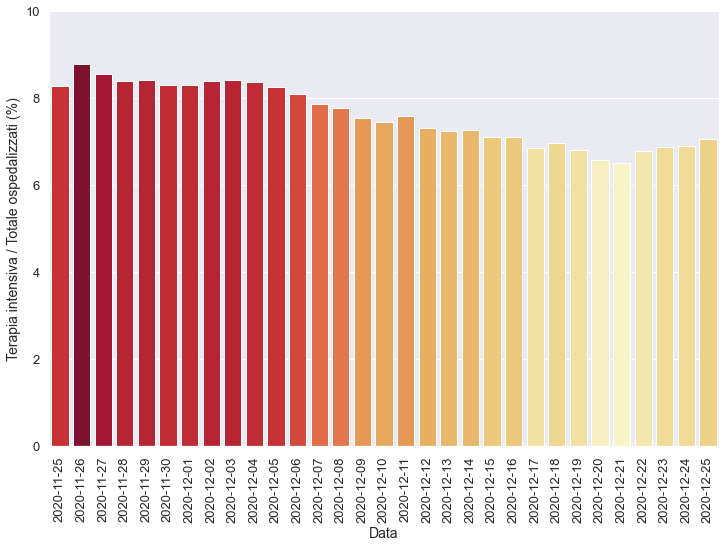

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

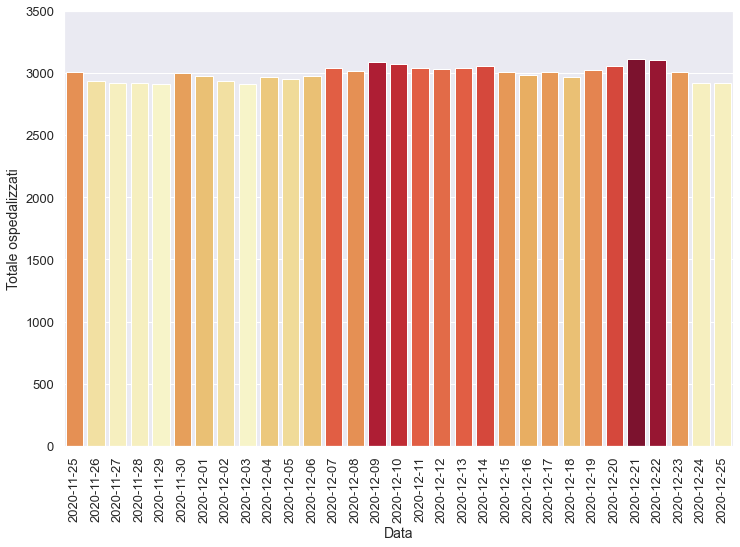

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

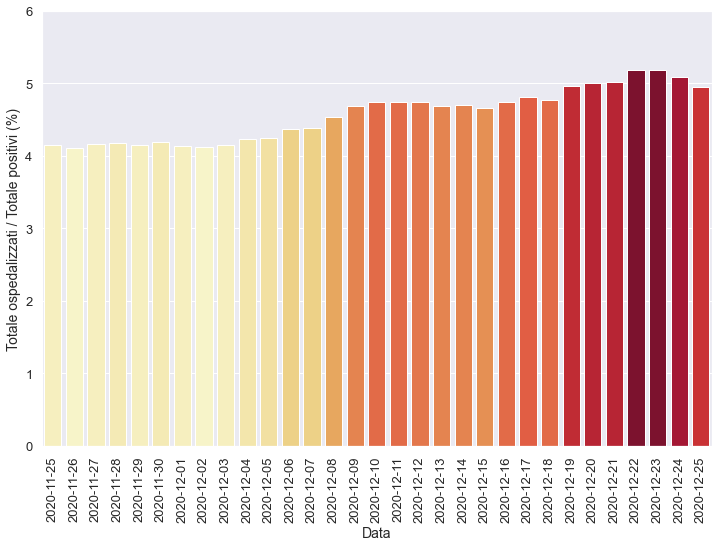

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

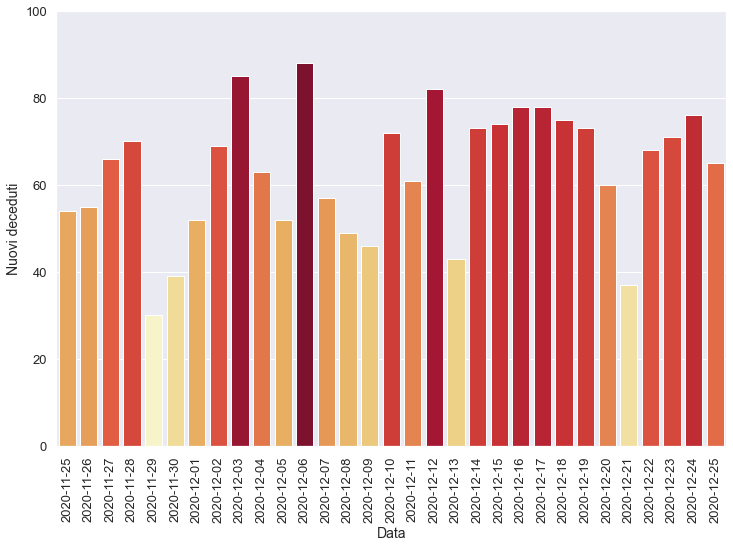

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

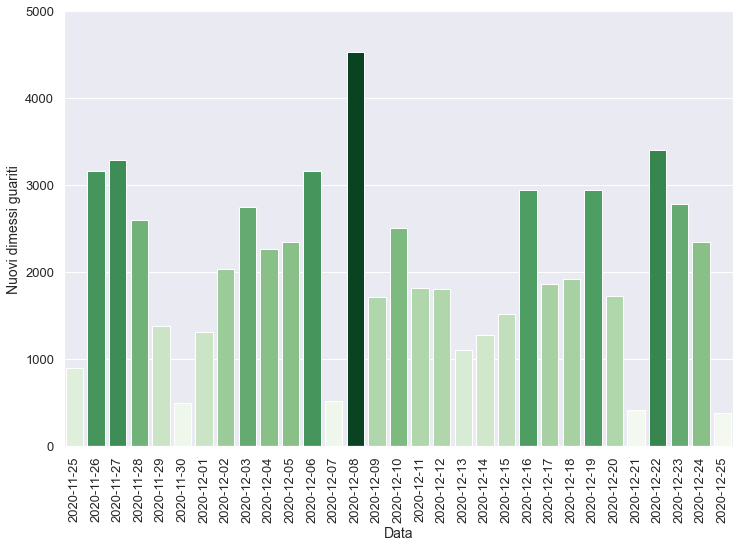

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-18T17:00:00,8,Emilia-Romagna,2764,207,2971,59355,62326,-251,1745,...,75.0,16762.0,4662.0,-215.0,6.97,4.77,10.41,37.43,0.49,-0.40
1,2020-12-19T17:00:00,8,Emilia-Romagna,2819,206,3025,57924,60949,-1377,1641,...,73.0,13851.0,4814.0,-1431.0,6.81,4.96,11.85,34.09,-0.48,-2.21
2,2020-12-20T17:00:00,8,Emilia-Romagna,2852,201,3053,57863,60916,-33,1751,...,60.0,11661.0,4620.0,-61.0,6.58,5.01,15.02,37.90,-2.43,-0.05
3,2020-12-21T17:00:00,8,Emilia-Romagna,2914,203,3117,58937,62054,1138,1594,...,37.0,7938.0,3699.0,1074.0,6.51,5.02,20.08,43.09,1.00,1.87
4,2020-12-22T17:00:00,8,Emilia-Romagna,2891,210,3101,56645,59746,-2308,1162,...,68.0,19892.0,4435.0,-2292.0,6.77,5.19,5.84,26.20,3.45,-3.72
5,2020-12-23T17:00:00,8,Emilia-Romagna,2803,207,3010,55015,58025,-1721,1129,...,71.0,17913.0,4765.0,-1630.0,6.88,5.19,6.30,23.69,-1.43,-2.88
6,2020-12-24T17:00:00,8,Emilia-Romagna,2718,201,2919,54380,57299,-726,1692,...,76.0,15906.0,5825.0,-635.0,6.89,5.09,10.64,29.05,-2.90,-1.25
7,2020-12-25T17:00:00,8,Emilia-Romagna,2711,206,2917,56063,58980,1681,2127,...,65.0,10861.0,4546.0,1683.0,7.06,4.95,19.58,46.79,2.49,2.93


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

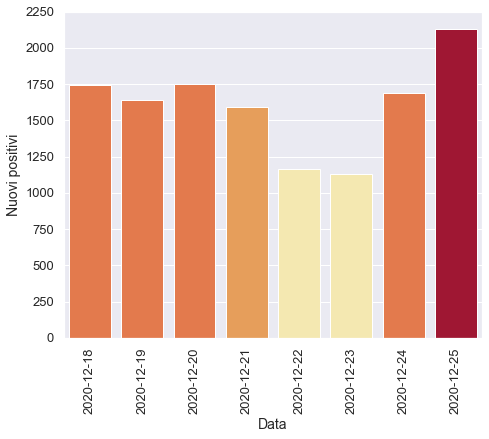

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

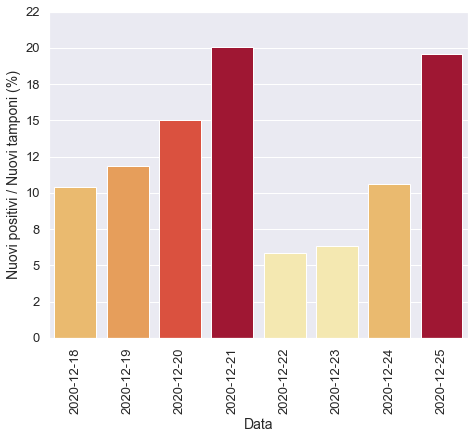

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

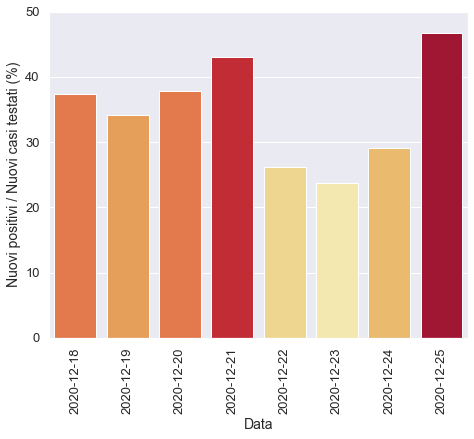

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

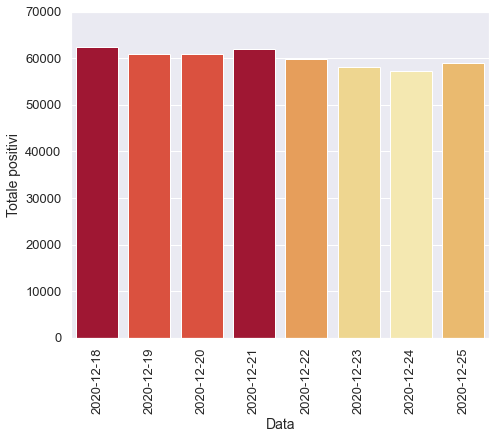

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

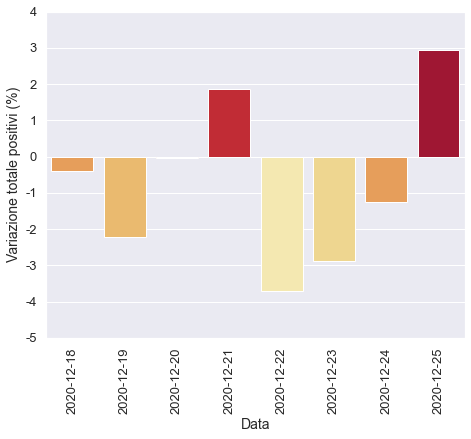

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

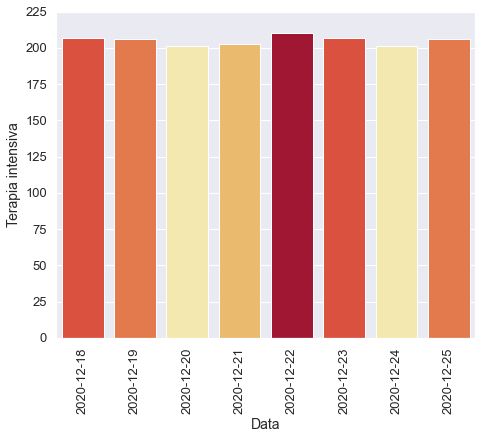

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

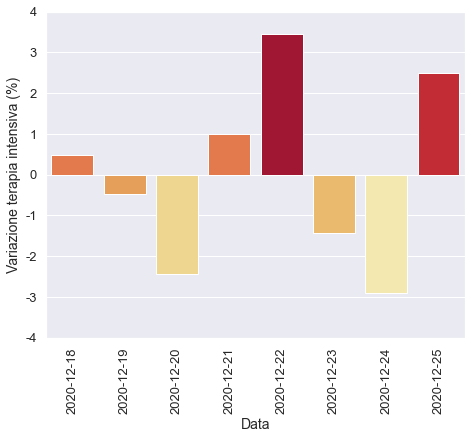

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

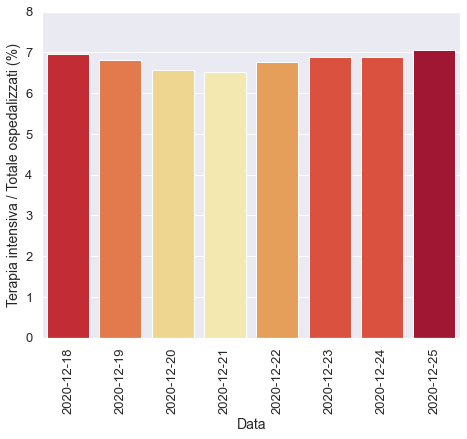

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

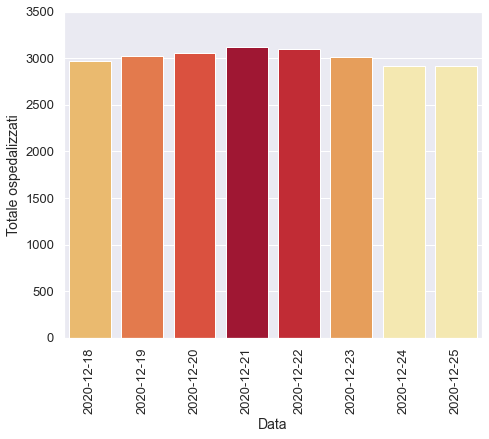

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

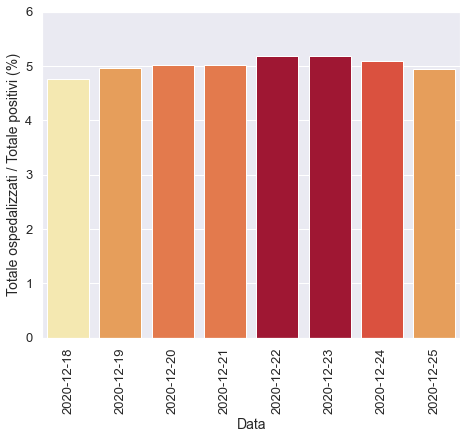

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

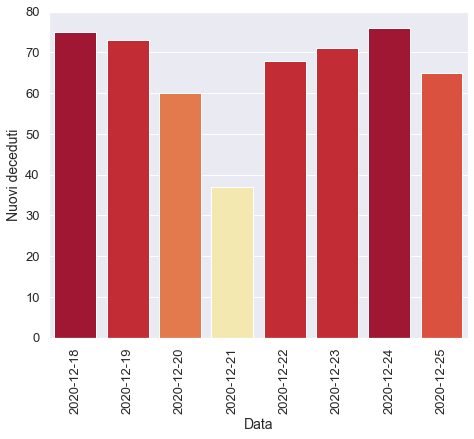

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

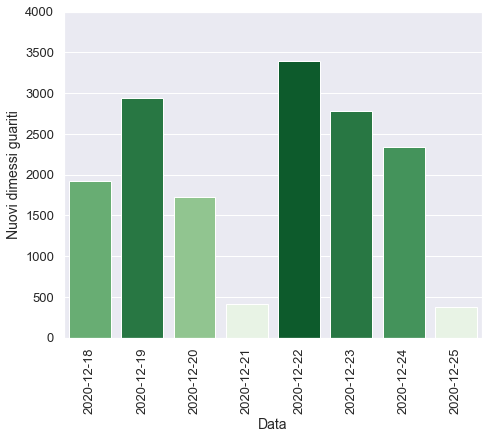

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)